In [1]:
!pip install pandas 
!pip install matplotlib
!pip install scikit-learn

In [20]:
import pandas as pd
import matplotlib.pyplot as plt



In [21]:
df = pd.read_csv("classified_jaundice_voltage.csv")

In [22]:
df.head()

,ADC Value,Voltage (V),Jaundice Level
0,465,1.500,Mild Jaundice
1,473,1.526,Mild Jaundice
2,475,1.532,Mild Jaundice
3,473,1.526,Mild Jaundice
4,474,1.529,Mild Jaundice


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ADC Value       173 non-null    int64  
 1   Voltage (V)     173 non-null    float64
 2   Jaundice Level  173 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [25]:
df.describe()

,ADC Value,Voltage (V)
count,173.000000,173.000000
mean,565.439306,1.823948
std,288.530948,0.930735
min,56.000000,0.181000
25%,378.000000,1.219000
50%,538.000000,1.735000
75%,814.000000,2.626000
max,1011.000000,3.261000


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
X = df[['Voltage (V)']]
y = df["Jaundice Level"]

In [35]:
label_encoder = LabelEncoder()
y_encode = label_encoder.fit_transform(y)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y_encode,test_size = 0.2,random_state = 42)

In [39]:
model = RandomForestClassifier(n_estimators = 1000,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9428571428571428
Classification Report:
                    precision    recall  f1-score   support

    Mild Jaundice       1.00      0.80      0.89        10
Moderate Jaundice       0.83      1.00      0.91         5
           Normal       0.90      1.00      0.95         9
  Severe Jaundice       1.00      1.00      1.00        11

         accuracy                           0.94        35
        macro avg       0.93      0.95      0.94        35
     weighted avg       0.95      0.94      0.94        35



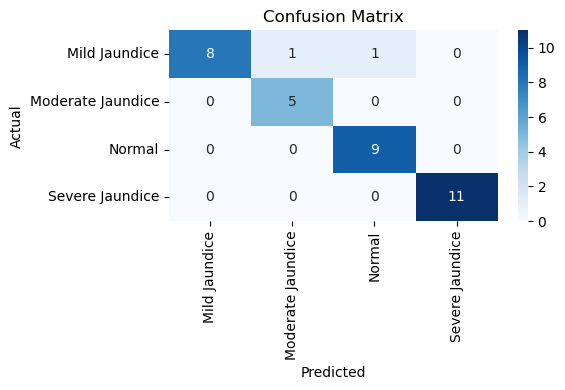

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


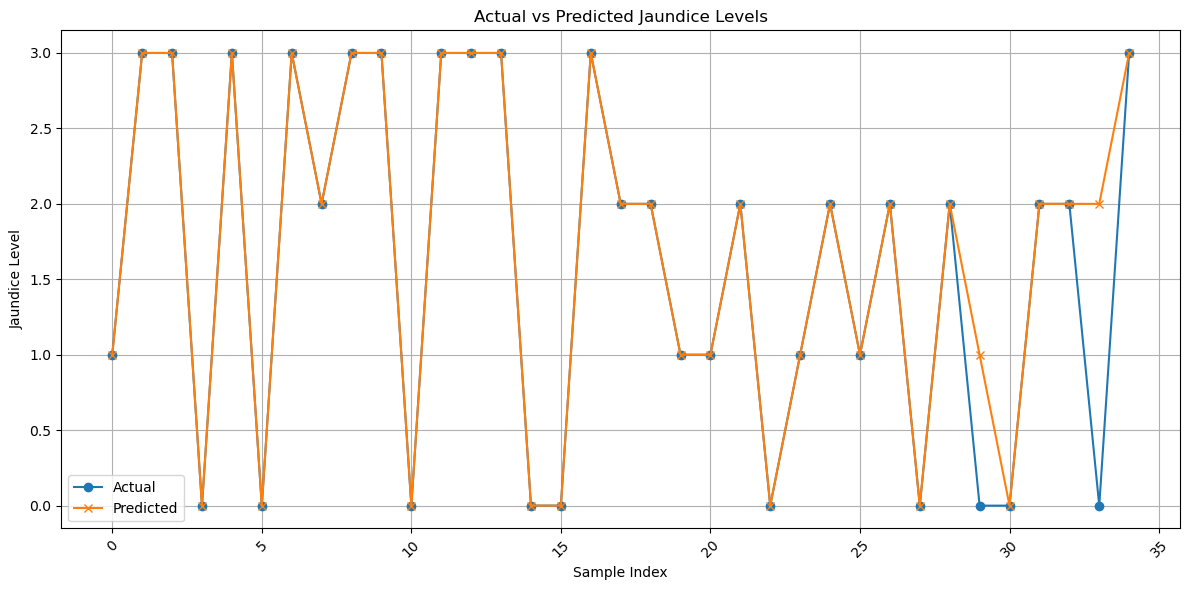

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Jaundice Levels')
plt.xlabel('Sample Index')
plt.ylabel('Jaundice Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
!pip install joblib

In [52]:
import joblib
joblib.dump(model,"jaundice_rf_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']